Eleanor Alarcón Neri - A01665593

Emma Sofia Aparicio Rodriguez - A01666223


---


# **K-means Implementation**


---



Link to Emma's repo: [emma's github](https://github.com/emmasofiaar/arte_analitica)

Link to Ele's repo: [ele's github](https://github.com/aneleanor/Mastering_Analytics)



---


### **Results creating functions manually**

In [11]:
# importamos librerias
import random as rm
import math
import matplotlib.pyplot as plt

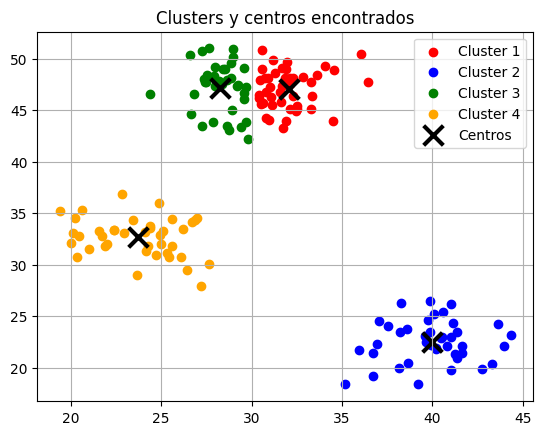

In [7]:
# function to calculate the euclidean distance between two different lists
def distancia(p1, p2):
    return math.sqrt(sum((a - b) ** 2 for a, b in zip(p1, p2)))

# function for the nearest centers
def cercanos(puntos, centros):
    asignados = [[] for _ in centros]
    for punto in puntos:
        distancias = [distancia(punto, centro) for centro in centros]
        indice = distancias.index(min(distancias))
        asignados[indice].append(punto)
    return asignados

# function to calculate the new centers as the average of the assigned points
def nuevos_centros(clusters):
    nuevos = []
    for grupo in clusters:
        if grupo:
            promedio = [sum(coord) / len(grupo) for coord in zip(*grupo)]
            nuevos.append(promedio)
        else:
            nuevos.append([])
    return nuevos

# function for k-means
def k_means(puntos, k):
    centros = rm.sample(puntos, k)
    for _ in range(100):
        clusters = cercanos(puntos, centros)
        nuevos = nuevos_centros(clusters)
        for i in range(k):
            if not nuevos[i]:
                nuevos[i] = rm.choice(puntos)
        centros = nuevos
    return centros, clusters

# function to graph the clusters
def graficar_clusters(clusters, centros):
    colores = ['red', 'blue', 'green', 'orange', 'purple', 'brown']
    for i, grupo in enumerate(clusters):
        xs = [p[0] for p in grupo]
        ys = [p[1] for p in grupo]
        plt.scatter(xs, ys, color=colores[i % len(colores)], label=f'Cluster {i+1}')

    # centers
    cx = [c[0] for c in centros]
    cy = [c[1] for c in centros]
    plt.scatter(cx, cy, color='black', marker='x', s=200, linewidths=3, label='Centers')
    plt.legend()
    plt.title("clusters and centers")
    plt.grid(True)
    plt.show()

# function to generate random points for our lists
def generar_puntos_aleatorios(k, puntos_por_cluster=30, dispersión=1.0):
    centros_reales = [[rm.uniform(0, 50), rm.uniform(0, 50)] for _ in range(k)]
    puntos = []
    for centro in centros_reales:
        for _ in range(puntos_por_cluster):
            x = rm.gauss(centro[0], dispersión)
            y = rm.gauss(centro[1], dispersión)
            puntos.append([x, y])
    return puntos

# example execution
k = 4
puntos = generar_puntos_aleatorios(k, puntos_por_cluster=40, dispersión=2.0)
centros_finales, clusters_finales = k_means(puntos, k)
graficar_clusters(clusters_finales, centros_finales)



---


### **Results using sklearn**

In [12]:
from sklearn.cluster import KMeans
import numpy as np

manual centers:
[32.04329296448017, 47.057837204076826]
[39.951278792770935, 22.510764718065037]
[28.280577475155738, 47.197759426365714]
[23.73040420984882, 32.663534028386266]

sklearn centers:
[28.30867090804736, 48.54671574271695]
[39.95127879277095, 22.510764718065033]
[23.730404209848825, 32.66353402838626]
[31.510867121752174, 46.30998862332851]


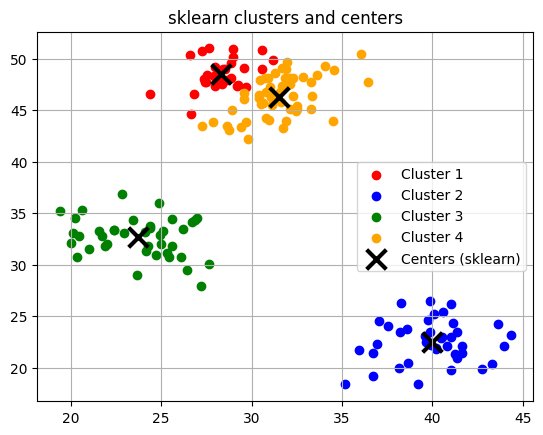

In [13]:
# we make the points a numpy array
X = np.array(puntos)

modelo = KMeans(n_clusters=k, n_init=10, max_iter=100, random_state=42)

modelo.fit(X)

# sklearn centers
centros_sklearn = modelo.cluster_centers_

# comparison between manual centers and sklearn centers
print("manual centers:")
for c in centros_finales:
    print(c)

print("\nsklearn centers:")
for c in centros_sklearn:
    print(c.tolist())


def graficar_clusters_sklearn(puntos, labels, centros):
    colores = ['red', 'blue', 'green', 'orange', 'purple', 'brown']
    for i in range(k):
        grupo = [puntos[j] for j in range(len(puntos)) if labels[j] == i]
        xs = [p[0] for p in grupo]
        ys = [p[1] for p in grupo]
        plt.scatter(xs, ys, color=colores[i % len(colores)], label=f'Cluster {i+1}')

    # centers
    cx = [c[0] for c in centros]
    cy = [c[1] for c in centros]
    plt.scatter(cx, cy, color='black', marker='x', s=200, linewidths=3, label='Centers (sklearn)')
    plt.legend()
    plt.title("sklearn clusters and centers")
    plt.grid(True)
    plt.show()

# sklearn graph
graficar_clusters_sklearn(puntos, modelo.labels_, centros_sklearn)



---
### **Conclusion (comparison of both methods)**

The centers obtained manually and with sklearn are very similar. Two centers are identical, and the others are close, showing only minor differences due to initialization and rounding. This confirms that the manual k-means implementation works correctly and gives results comparable to sklearn.


---

